Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt


1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 

# **KPI on Bank Marketing**

This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 
   

**Attribute information:**

Input variables:
  
   **bank client data:**
  
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
  
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
  
   5 - default: has credit in default? (categorical: "no","yes","unknown")
  
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
  
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
  
   **related with the last contact of the current campaign:**
   
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
 
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

   **other attributes:**
 
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   
   **social and economic context attributes**
  
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
 
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     

  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
 
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  **Output variable (desired target):**
 
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [2]:
%matplotlib inline

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv("bank-additional-full.csv", sep=";")

In [5]:
df.shape

(41188, 21)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### **Conversion Rate**

As per the field description, the output variable, y, which has information on whether a client has subscribed to a term deposit, is encoded as 'yes' or 'no'. In order to simplify our conversion rate computations, we will encode this variable as 1 for 'yes' and 0 for 'no'. 

In [7]:
df["conversion"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)

In [8]:
df[["y", "conversion"]].sample(n = 5)

,y,conversion
3283,no,0
17363,no,0
10561,no,0
26174,no,0
8814,no,0


### **Aggregate conversion rate**

In [9]:
print("total conversions: %i out of %i" % (df.conversion.sum(), df.shape[0]))

total conversions: 4640 out of 41188


In [10]:
print("conversion rate: %0.2f%%" % (df.conversion.sum() / df.shape[0] * 100))

conversion rate: 11.27%


We have ***4640*** converted clients out of total of ***41188*** bank clients, which suggests the aggregate conversion rate is ***11.27%***.

### **Conversion rates by contact**

In [11]:
pd.DataFrame(
    df.groupby(
        by='campaign'
    )['conversion'].sum()
)

,conversion
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


In [12]:
pd.DataFrame(
    df.groupby(
        by='campaign'
    )['conversion'].count()
)

,conversion
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


In [13]:
conversions_by_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0

In [14]:
pd.DataFrame(conversions_by_contacts)

,conversion
campaign,
1,13.037071
2,11.456954
3,10.747051
4,9.392682
5,7.504690
6,7.660878
7,6.041335
8,4.250000
9,6.007067


In [17]:
conversions_by_contacts[:10]

campaign
1     13.037071
2     11.456954
3     10.747051
4      9.392682
5      7.504690
6      7.660878
7      6.041335
8      4.250000
9      6.007067
10     5.333333
Name: conversion, dtype: float64

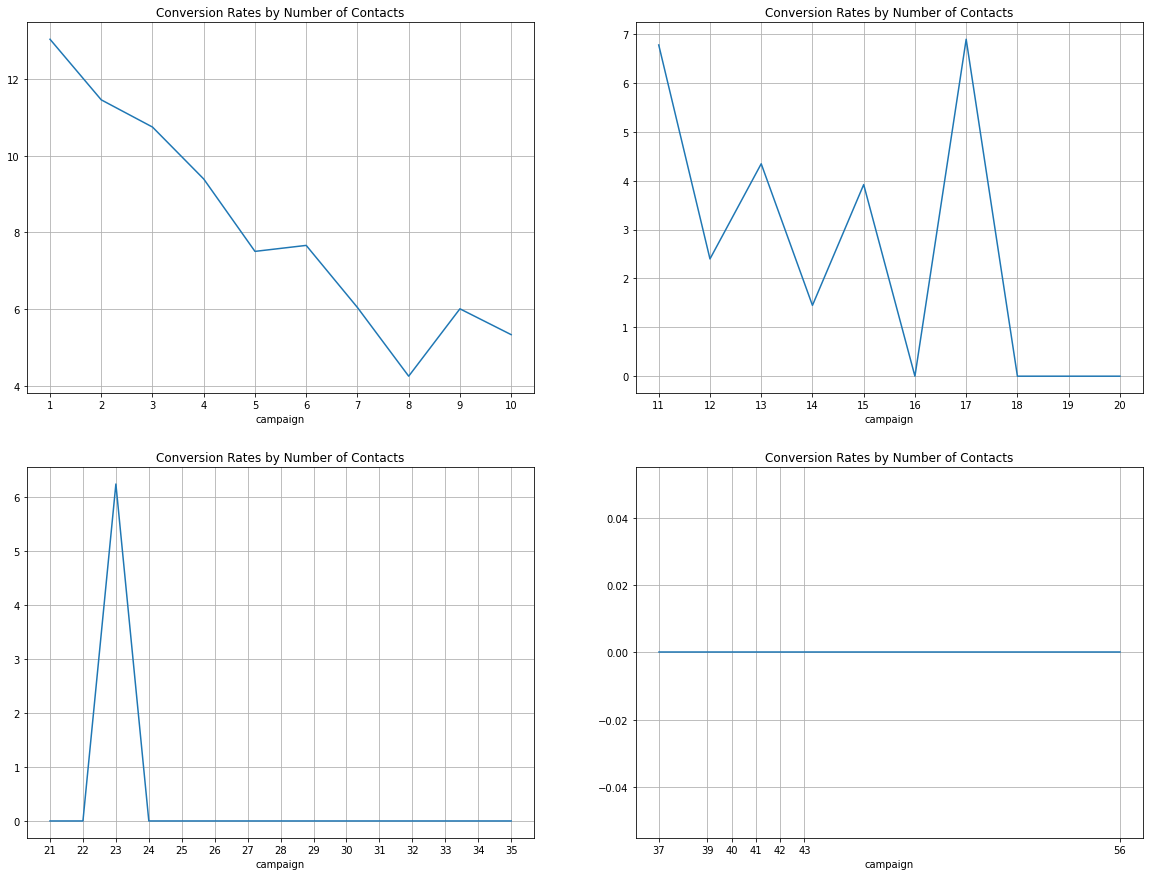

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(20, 15))

# Plot data to each axis
conversions_by_contacts[:10].plot(
    grid=True,
    xticks=conversions_by_contacts.index[:10],
    title='Conversion Rates by Number of Contacts', 
    ax=ax1
)

conversions_by_contacts[10:20].plot(
    grid=True,
    xticks=conversions_by_contacts.index[10:20],
    title='Conversion Rates by Number of Contacts', 
    ax=ax2
)

conversions_by_contacts[20:35].plot(
    grid=True,
    xticks=conversions_by_contacts.index[20:35],
    title='Conversion Rates by Number of Contacts', 
    ax=ax3
)

conversions_by_contacts[35:50].plot(
    grid=True,
    xticks=conversions_by_contacts.index[35:50],
    title='Conversion Rates by Number of Contacts', 
    ax=ax4
)





One thing that is noticeable in the previous line charts is the fact that after 10-15 contacts there are no significant conversions. 

### **Conversion rates by age**

In [19]:
pd.DataFrame(
    df.groupby(
        by = "age"
    )["conversion"].sum()
)

,conversion
age,
17,2
18,12
19,20
20,23
21,29
...,...
91,0
92,3
94,0


In [20]:
pd.DataFrame(
    df.groupby(
        by = "age"
    )["conversion"].count()
)

,conversion
age,
17,5
18,28
19,42
20,65
21,102
...,...
91,2
92,4
94,1


In [21]:
conversions_by_age = df.groupby(
    by = "age"
)["conversion"].sum() / df.groupby(
    by = "age"
)["conversion"].count() * 100.0

In [22]:
pd.DataFrame(conversions_by_age)

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


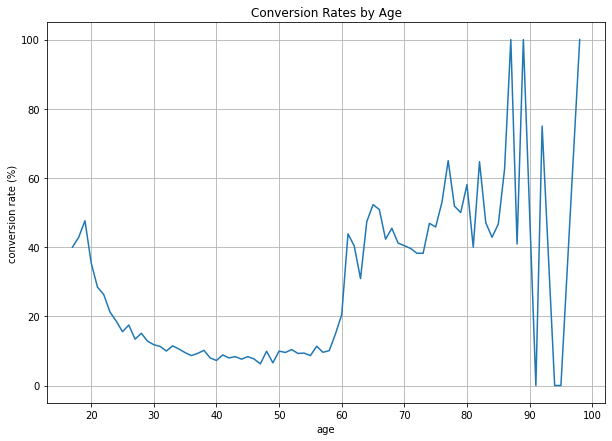

In [23]:
ax = conversions_by_age.plot(
    grid = True, 
    figsize = (10, 7), 
    title = "Conversion Rates by Age"
)

ax.set_xlabel("age")
ax.set_ylabel("conversion rate (%)")
plt.show()

There seems to be lots of noise in old age groups. Conversion rates for those who are 70 or older vary a lot and if you look at the data, this is mostly because the number of clients in this age group is relatively small, compared to other afe groups.

In [24]:
df["age_group"] = df["age"].apply(
    lambda x: "[18, 30)" if x < 30 else "[30, 40)" if x < 40 \
        else "[40, 50)" if x < 50 else "[50, 60)" if x < 60 \
        else "[60, 70)" if x < 70 else "70+"
)

In [25]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[30, 40)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[40, 50)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"


In [27]:
pd.DataFrame(
    df.groupby(
        by="age_group"
    )["conversion"].sum()
)

,conversion
age_group,
70+,221
"[18, 30)",922
"[30, 40)",1715
"[40, 50)",834
"[50, 60)",697
"[60, 70)",251


In [28]:
pd.DataFrame(
    df.groupby(
        by="age_group"
    )["conversion"].count()
)

,conversion
age_group,
70+,469
"[18, 30)",5669
"[30, 40)",16938
"[40, 50)",10526
"[50, 60)",6862
"[60, 70)",724


In [29]:
conversions_by_age_group = df.groupby(
    by = "age_group"
)["conversion"].sum() / df.groupby(
    by = "age_group"
)["conversion"].count() * 100.0

In [30]:
pd.DataFrame(conversions_by_age_group)

,conversion
age_group,
70+,47.121535
"[18, 30)",16.263891
"[30, 40)",10.125162
"[40, 50)",7.923238
"[50, 60)",10.157389
"[60, 70)",34.668508


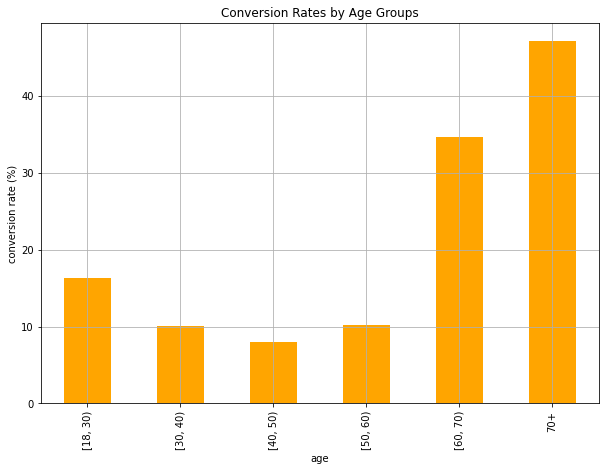

In [35]:
ax = conversions_by_age_group.loc[
                                  ["[18, 30)", "[30, 40)", "[40, 50)", "[50, 60)", "[60, 70)", "70+"]
].plot(
    kind = "bar", 
    color = "orange", 
    grid = True, 
    figsize = (10, 7), 
    title = "Conversion Rates by Age Groups"
)

ax.set_xlabel("age")
ax.set_ylabel("conversion rate (%)")
plt.show()

### **Conversions vs Non-Conversions**

Demographic difference between the converted clients and non-converted clients. This type of analysis can help us identify what differentiates converted groups from non-converted groups in our marketing campaigns and help us understand our target clients better and what types of customers respond better to our marketing efforts.

**Marital Status**

In [36]:
conversions_by_marital_status_df = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status_df

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [37]:
conversions_by_marital_status_df.columns = ['non_conversions', 'conversions']


In [38]:
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


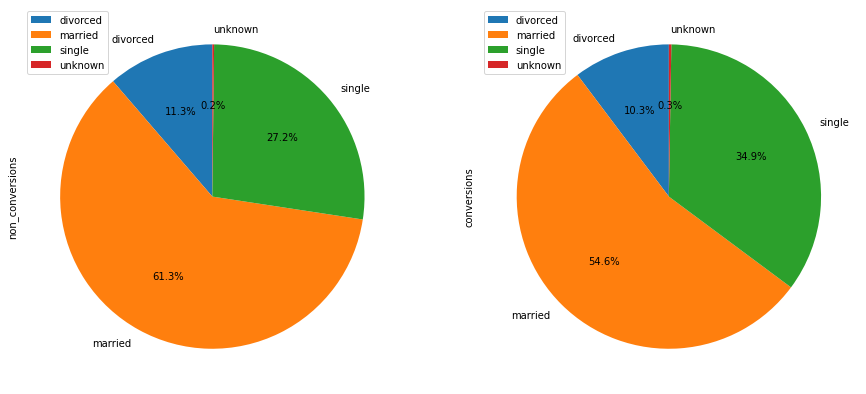

In [39]:
conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

We can easily see that the **married** group takes up the largest proportions in both conversions and non-conversions groups.

**Education**

In [40]:
conversions_by_education_df = pd.pivot_table(df, values='y', index='education', columns='conversion', aggfunc=len)
conversions_by_education_df

conversion,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [41]:
conversions_by_education_df.columns = ['non_conversions', 'conversions']

In [42]:
conversions_by_education_df

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


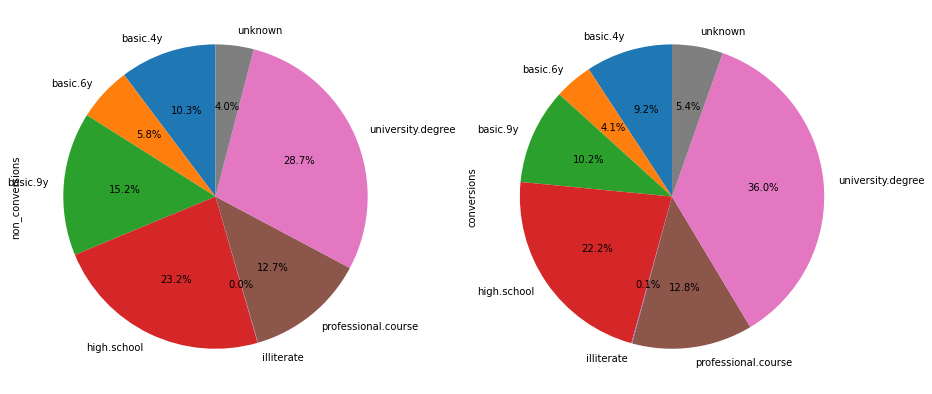

In [43]:
conversions_by_education_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False
)

plt.show()

universtiy degree holders group are more in conversions than the non_conversions group

**Last Contact Duration**

In [44]:
df.groupby('conversion')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


In [45]:
duration_df = pd.concat([
    df.loc[df['conversion'] == 1, 'duration'].reset_index(drop=True), 
    df.loc[df['conversion'] == 0, 'duration'].reset_index(drop=True)
], axis=1)

duration_df.columns = ['conversions', 'non_conversions']

duration_df = duration_df / (60*60)

In [46]:
duration_df

,conversions,non_conversions
0,0.437500,0.072500
1,0.289444,0.041389
2,0.407500,0.062778
3,0.160833,0.041944
4,0.128056,0.085278
...,...,...
36543,NaN,0.070556
36544,NaN,0.031111
36545,NaN,0.106389
36546,NaN,0.052500


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


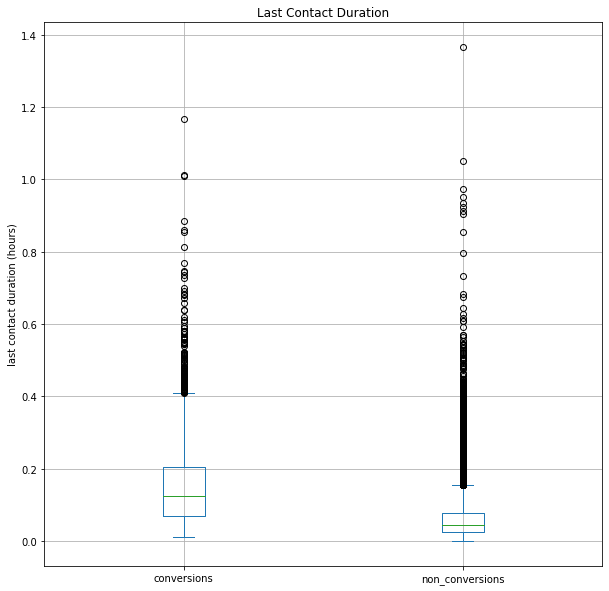

In [47]:
ax = duration_df.plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('last contact duration (hours)')
ax.set_title('Last Contact Duration')

plt.show()

It looks like there is sight difference between the distributions of the two but it can't be proved that longer duration affect the conversion rate due to extreme outlier in each group.

### **Converions by Age Groups & Marital Status**

In [48]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)


In [49]:
age_marital_df = age_marital_df.divide(
    df.groupby(
        by='age_group'
    )['conversion'].count(), 
    axis=0
)

In [50]:
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18, 30)",0.002117,0.027871,0.132475,0.000176
"[30, 40)",0.007557,0.052958,0.040383,0.000354
"[40, 50)",0.011970,0.054627,0.012350,0.000285
"[50, 60)",0.017342,0.077674,0.006412,0.000146
"[60, 70)",0.037293,0.301105,0.006906,0.001381


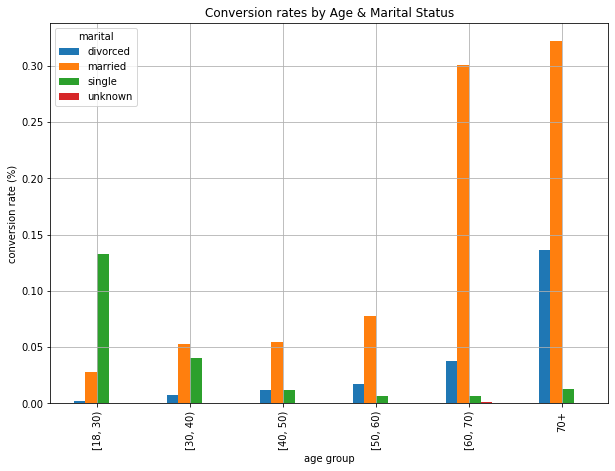

In [51]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

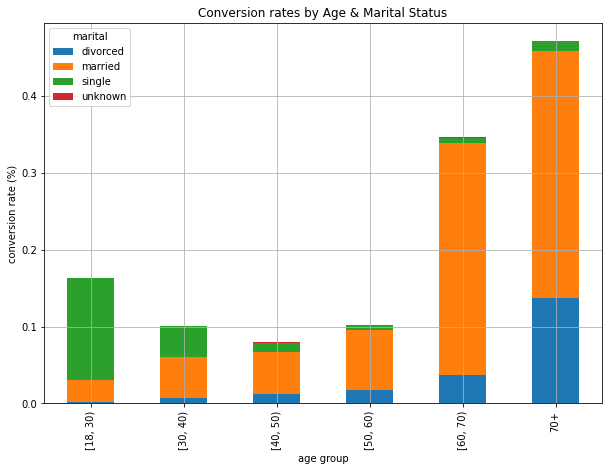

In [52]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

### **Conversion by month**

In [53]:
conversions_by_month_df = pd.pivot_table(df, values='y', index='month', columns='conversion', aggfunc=len)
conversions_by_month_df

conversion,0,1
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


In [54]:
conversions_by_month_df.columns = ['non_conversions', 'conversions']

In [55]:
conversions_by_month_df

,non_conversions,conversions
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


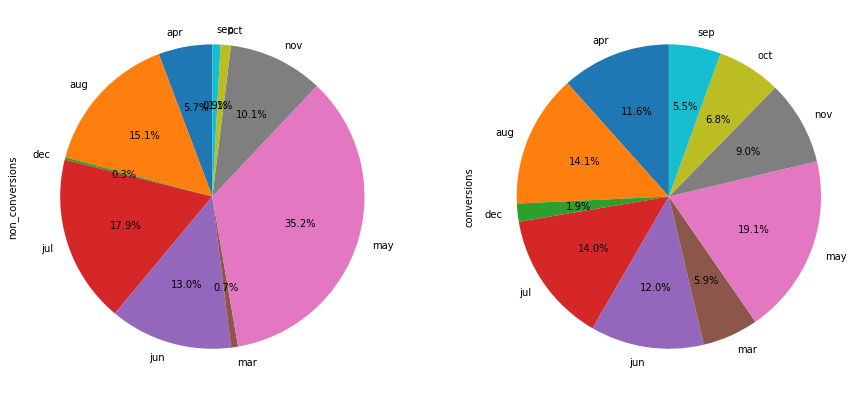

In [56]:
conversions_by_month_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False
)

plt.show()

march, april, september, october had more conversion rates as compared to its counterpart. **May** has the highest non-conversion rate.